In [4]:
library(ggplot2)
library(gridExtra)
library(ape)
library(spdep)
library(lawstat)

Loading required package: sp

Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Loading required package: sf

Linking to GEOS 3.5.1, GDAL 2.2.2, PROJ 4.9.2

Registered S3 method overwritten by 'spdep':
  method   from
  plot.mst ape 



In [5]:
r=read.table('../Tables/chem_landscape_data.csv', header=T, sep=',')
r$id=as.factor(r$id)
r$morpho = factor(r$morpho,levels(r$morpho)[c(2,1)])
sfm=r[r$morpho=='SFM',]
sfm=sfm[sfm$id!=44,]
ffm=r[r$morpho=='FFM',]
nrow(sfm)
nrow(ffm)

[1] 393

[1] 84

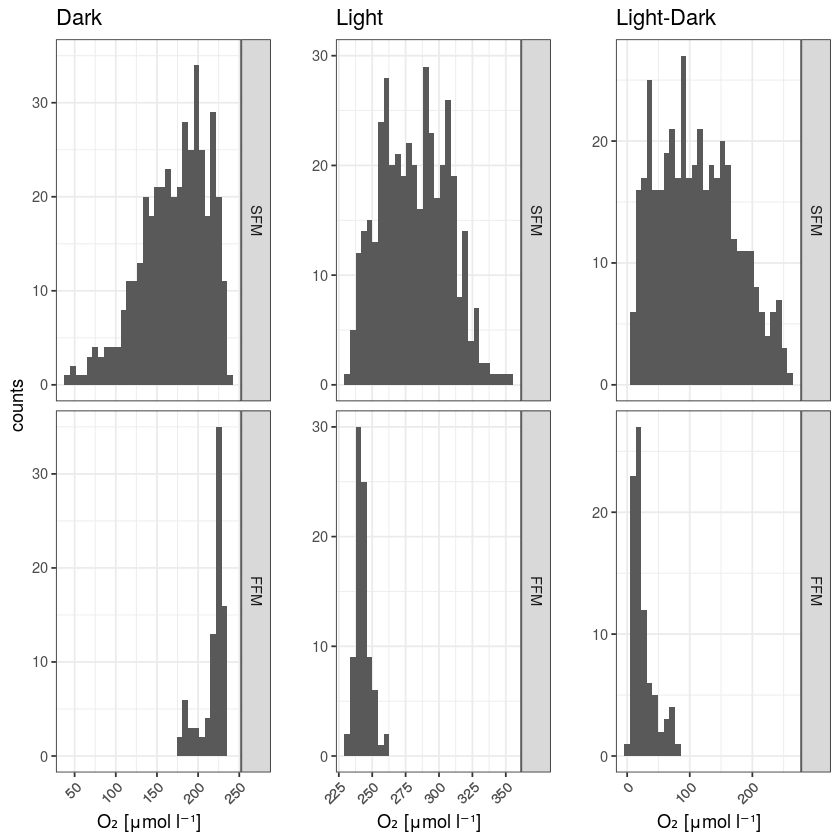

In [7]:
b=30
theme_set(theme_gray(base_size = 28))

p1=ggplot(r, aes(x=o2.dark))+
    geom_histogram(bins=b)+facet_grid(morpho~.)+theme_bw()+
    ylab('counts')+xlab('O₂ [μmol l⁻¹]')+
theme(axis.text.x = element_text(angle = 45, hjust = 1))
p2=ggplot(r, aes(x=o2.light))+
    geom_histogram(bins=b)+facet_grid(morpho~.)+theme_bw()+
    ylab('')+xlab('O₂ [μmol l⁻¹]')+
theme(axis.text.x = element_text(angle = 45, hjust = 1))
p3=ggplot(r, aes(x=o2.light-o2.dark))+
    geom_histogram(bins=b)+facet_grid(morpho~.)+theme_bw()+
    ylab('')+xlab('O₂ [μmol l⁻¹]')+
theme(axis.text.x = element_text(angle = 45, hjust = 1))
# svg('../plots-figures/FinalFigures/Fig6/panelA.svg', width=6, height=3)#, res=300, units='in')
grid.arrange(p1+ggtitle('Dark'),p2+ggtitle('Light'),p3+ggtitle('Light-Dark'),ncol=3)
# dev.off()


In [31]:
median(sfm$o2.light-sfm$o2.dark)
mean(sfm$o2.light-sfm$o2.dark)
quantile(sfm$o2.light-sfm$o2.dark,c(0.1,0.9))
max(sfm$o2.light-sfm$o2.dark)
min(sfm$o2.light-sfm$o2.dark)


[1] 103.6616

[1] 109.7987

10%       90% 
 31.72568 198.20788

[1] 264.42

[1] 4.693207

In [32]:
median(ffm$o2.light-ffm$o2.dark)
mean(ffm$o2.light-ffm$o2.dark)
quantile(ffm$o2.light-ffm$o2.dark,c(0.1,0.9))
max(ffm$o2.light-ffm$o2.dark)
min(ffm$o2.light-ffm$o2.dark)

[1] 18.5665

[1] 24.57818

10%       90% 
 8.277057 53.353572

[1] 76.26021

[1] 4.262802

In [26]:
shapiro.test(sfm$o2.dark)
shapiro.test(sfm$o2.light)
shapiro.test(ffm$o2.dark)
shapiro.test(ffm$o2.light)
shapiro.test(sfm$o2.light-sfm$o2.dark)
shapiro.test(ffm$o2.light-ffm$o2.dark)


	Shapiro-Wilk normality test

data:  sfm$o2.dark
W = 0.95469, p-value = 8.902e-10



	Shapiro-Wilk normality test

data:  sfm$o2.light
W = 0.98429, p-value = 0.000236



	Shapiro-Wilk normality test

data:  ffm$o2.dark
W = 0.78856, p-value = 1.22e-09



	Shapiro-Wilk normality test

data:  ffm$o2.light
W = 0.94145, p-value = 0.0008328



	Shapiro-Wilk normality test

data:  sfm$o2.light - sfm$o2.dark
W = 0.97003, p-value = 2.415e-07



	Shapiro-Wilk normality test

data:  ffm$o2.light - ffm$o2.dark
W = 0.83081, p-value = 2.179e-08


In [34]:
wilcox.test(o2.dark~morpho, data=r, paired=F)
wilcox.test(o2.light~morpho, data=r, paired=F)
wilcox.test(o2.light-o2.dark~morpho, data=r, paired=F)


	Wilcoxon rank sum test with continuity correction

data:  o2.dark by morpho
W = 4365, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  o2.light by morpho
W = 32843, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  o2.light - o2.dark by morpho
W = 32328, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [35]:
levene.test(r$o2.dark,r$morpho,location='median')
levene.test(r$o2.light,r$morpho,location='median')
levene.test(r$o2.light-r$o2.dark,r$morpho,location='median')

ERROR: Error in levene.test(r$o2.dark, r$morpho, location = "median"): could not find function "levene.test"


In [ ]:
###############3

In [66]:
r=read.table('../Tables/profiles_slopes.csv', header=T, sep=',')
rc=read.table('../Tables/profiles_slopes_cropped.csv', header=T, sep=',')
r$id=as.factor(r$id)
r$morpho = factor(r$morpho,levels(r$morpho)[c(2,1)])
rc$morpho = factor(rc$morpho,levels(rc$morpho)[c(2,1)])

ra=read.table('../Tables/chem_landscape_data.csv', header=T, sep=',')
ra$id=as.factor(ra$id)
ra$morpho = factor(ra$morpho,levels(ra$morpho)[c(2,1)])
ra$id1=paste(ra$id,r$morpho)

In [63]:
s=.5
p1=ggplot(ra, aes(x=dist,y=o2.dark,group=id))+
geom_point(size=s)+geom_line()+theme_bw()+
theme(legend.title=element_blank())+
ylab('O₂ [μmol l⁻¹]')+xlab('depth into the biofilm [mm]')+
facet_grid(.~morpho)+ggtitle('Dark')+
theme(plot.title = element_text(hjust = 0.5))+
theme(axis.text.x = element_text(angle = 45, hjust = 1))

p3=ggplot(r, aes(y=slope.dark,x=morpho))+
geom_boxplot()+geom_point(size=s)+theme_bw()+
ylab('slope [μmol l⁻¹ mm⁻¹]')+xlab('')

p2=ggplot(ra, aes(x=dist,y=o2.light,group=id))+
geom_point(size=s)+geom_line()+theme_bw()+
theme(legend.title=element_blank())+
ylab('O₂ [μmol l⁻¹]')+xlab('depth into the biofilm [mm]')+
facet_grid(.~morpho)+ggtitle('Light')+
theme(plot.title = element_text(hjust = 0.5))+
theme(axis.text.x = element_text(angle = 45, hjust = 1))

p4=ggplot(r, aes(y=slope.light,x=morpho))+
geom_boxplot()+geom_point(size=s)+theme_bw()+
ylab('slope [μmol l⁻¹ mm⁻¹]')+xlab('')

p5=ggplot(ra, aes(x=dist,y=o2.light-o2.dark,group=id))+
geom_point(size=s)+geom_line()+theme_bw()+
theme(legend.title=element_blank())+
ylab('O₂ [μmol l⁻¹]')+xlab('depth into the biofilm [mm]')+
facet_grid(.~morpho)+ggtitle('Light - Dark')+
theme(plot.title = element_text(hjust = 0.5))+
theme(axis.text.x = element_text(angle = 45, hjust = 1))

p6=ggplot(r, aes(y=slope.diff,x=morpho))+
geom_boxplot(outlier.size=s)+geom_point(size=s)+theme_bw()+
ylab('slope [μmol l⁻¹ mm⁻¹]')+xlab('')

svg('../plots-figures/FinalFigures/Fig6/panelB.svg', width=6, height=4)#, res=300, units='in')
grid.arrange(p1,p2,p5,p3,p4,p6,ncol=3)
dev.off()

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


png 
  2

In [68]:
t.test(r[r$morpho=='SFM',]$slope.dark,r[r$morpho=='FFM',]$slope.dark)
t.test(r[r$morpho=='SFM',]$slope.light,r[r$morpho=='FFM',]$slope.light)
t.test(r[r$morpho=='SFM',]$slope.diff,r[r$morpho=='FFM',]$slope.diff)


	Welch Two Sample t-test

data:  r[r$morpho == "SFM", ]$slope.dark and r[r$morpho == "FFM", ]$slope.dark
t = -6.0543, df = 47.244, p-value = 2.188e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -95.45735 -47.84639
sample estimates:
 mean of x  mean of y 
-136.23493  -64.58306 



	Welch Two Sample t-test

data:  r[r$morpho == "SFM", ]$slope.light and r[r$morpho == "FFM", ]$slope.light
t = 4.1065, df = 52.071, p-value = 0.0001422
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 29.52058 85.93669
sample estimates:
mean of x mean of y 
116.01645  58.28781 



	Welch Two Sample t-test

data:  r[r$morpho == "SFM", ]$slope.diff and r[r$morpho == "FFM", ]$slope.diff
t = 6.2923, df = 47.653, p-value = 9.204e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  88.03087 170.73014
sample estimates:
mean of x mean of y 
 252.2514  122.8709 


In [65]:
inv_dist = with(r[r$morpho=='SFM',], 1/dist(cbind(x, y), diag = T, upper = T))
inv_dist[inv_dist==Inf]=0
inv_dist = as.matrix(inv_dist)
Moran.I(r[r$morpho=='SFM',]$slope.dark, weight = inv_dist, scaled=T)
Moran.I(r[r$morpho=='SFM',]$slope.light, weight = inv_dist, scaled=T)
Moran.I(r[r$morpho=='SFM',]$slope.diff, weight = inv_dist, scaled=T)

# moran.plot(r[r$morpho=='SFM',]$slope.dark,mat2listw(inv_dist))

$observed
[1] -0.05525834

$expected
[1] -0.02941176

$sd
[1] 0.05412507

$p.value
[1] 0.6329817

$observed
[1] 0.04329744

$expected
[1] -0.02941176

$sd
[1] 0.0543706

$p.value
[1] 0.1811283

$observed
[1] 0.03038415

$expected
[1] -0.02941176

$sd
[1] 0.05405212

$p.value
[1] 0.2686123

In [66]:
inv_dist = with(r[r$morpho=='FFM',], 1/dist(cbind(x, y), diag = T, upper = T))
inv_dist[inv_dist==Inf]=0
inv_dist = as.matrix(inv_dist)
Moran.I(r[r$morpho=='FFM',]$slope.dark, weight = inv_dist, scaled=T)
Moran.I(r[r$morpho=='FFM',]$slope.light, weight = inv_dist, scaled=T)
Moran.I(r[r$morpho=='FFM',]$slope.diff, weight = inv_dist, scaled=T)


$observed
[1] -0.135155

$expected
[1] -0.05

$sd
[1] 0.08006746

$p.value
[1] 0.2875367

$observed
[1] -0.07289969

$expected
[1] -0.05

$sd
[1] 0.08061362

$p.value
[1] 0.7763588

$observed
[1] -0.1432085

$expected
[1] -0.05

$sd
[1] 0.07833791

$p.value
[1] 0.2341146

In [69]:
r=r[complete.cases(r$slope.dark),]
m=lm(slope.dark~morpho*h,data=r)
summary(m)
m1=lm(slope.light~morpho*h,data=r)
summary(m1)
m1=lm(slope.diff~morpho*h,data=r)
summary(m1)


Call:
lm(formula = slope.dark ~ morpho * h, data = r)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.334 -32.062   0.625  31.686  97.889 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -102.59      21.88  -4.689 2.02e-05 ***
morphoFFM      41.72      27.91   1.495    0.141    
h             -56.89      34.77  -1.636    0.108    
morphoFFM:h    36.90      84.92   0.434    0.666    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.22 on 52 degrees of freedom
Multiple R-squared:  0.4171,	Adjusted R-squared:  0.3835 
F-statistic:  12.4 on 3 and 52 DF,  p-value: 3.11e-06



Call:
lm(formula = slope.light ~ morpho * h, data = r)

Residuals:
     Min       1Q   Median       3Q      Max 
-107.485  -27.651    2.464   37.865   98.802 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   214.39      23.37   9.173 1.88e-12 ***
morphoFFM    -135.78      29.81  -4.555 3.20e-05 ***
h            -166.34      37.14  -4.479 4.14e-05 ***
morphoFFM:h    56.91      90.71   0.627    0.533    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.23 on 52 degrees of freedom
Multiple R-squared:  0.4433,	Adjusted R-squared:  0.4112 
F-statistic:  13.8 on 3 and 52 DF,  p-value: 9.659e-07



Call:
lm(formula = slope.diff ~ morpho * h, data = r)

Residuals:
    Min      1Q  Median      3Q     Max 
-164.01  -52.70   -0.67   47.05  172.16 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   316.98      37.78   8.390  3.1e-11 ***
morphoFFM    -177.50      48.19  -3.683 0.000549 ***
h            -109.45      60.04  -1.823 0.074066 .  
morphoFFM:h    20.01     146.65   0.136 0.891990    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 76.36 on 52 degrees of freedom
Multiple R-squared:  0.4436,	Adjusted R-squared:  0.4115 
F-statistic: 13.82 on 3 and 52 DF,  p-value: 9.554e-07


In [78]:
r=r[complete.cases(r$slope.dark),]
m=lm(slope.dark~h,data=r)
summary(m)
m1=lm(slope.light~h,data=r)
summary(m1)


Call:
lm(formula = slope.dark ~ h, data = r)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.539 -35.369   2.793  39.555  98.348 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -57.97      11.92  -4.864 1.04e-05 ***
h            -116.99      23.10  -5.064 5.10e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.8 on 54 degrees of freedom
Multiple R-squared:  0.322,	Adjusted R-squared:  0.3094 
F-statistic: 25.65 on 1 and 54 DF,  p-value: 5.105e-06



Call:
lm(formula = slope.light ~ h, data = r)

Residuals:
    Min      1Q  Median      3Q     Max 
-106.80  -52.17  -12.13   43.12  120.54 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  94.0768    15.8242   5.945 2.09e-07 ***
h             0.6634    30.6674   0.022    0.983    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 62.12 on 54 degrees of freedom
Multiple R-squared:  8.666e-06,	Adjusted R-squared:  -0.01851 
F-statistic: 0.000468 on 1 and 54 DF,  p-value: 0.9828


In [39]:
rc=rc[complete.cases(rc$slope.dark),]
t.test(rc[rc$morpho=='SFM',]$slope.dark,rc[rc$morpho=='FFM',]$slope.dark)
t.test(rc[rc$morpho=='SFM',]$slope.light,rc[rc$morpho=='FFM',]$slope.light)
t.test(rc[rc$morpho=='SFM',]$slope.diff,rc[rc$morpho=='FFM',]$slope.diff)



	Welch Two Sample t-test

data:  rc[rc$morpho == "SFM", ]$slope.dark and rc[rc$morpho == "FFM", ]$slope.dark
t = -7.5834, df = 52.406, p-value = 5.559e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -146.80878  -85.38072
sample estimates:
 mean of x  mean of y 
-184.81414  -68.71939 



	Welch Two Sample t-test

data:  rc[rc$morpho == "SFM", ]$slope.light and rc[rc$morpho == "FFM", ]$slope.light
t = 8.2316, df = 52.746, p-value = 4.952e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 154.7873 254.5364
sample estimates:
mean of x mean of y 
 333.3089  128.6471 


ERROR: Error in t.test.default(rc[rc$morpho == "SFM", ]$slope.diff, rc[rc$morpho == : data are essentially constant


Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”



	Welch Two Sample t-test

data:  sfm$slope.light/sfm$slope.dark and ffm$slope.light/ffm$slope.dark
t = -1.2305, df = 20.041, p-value = 0.2328
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12.329511   3.179736
sample estimates:
 mean of x  mean of y 
-0.9859181  3.5889697 



Call:
lm(formula = slope.light/slope.dark ~ h, data = ffm)

Residuals:
   Min     1Q Median     3Q    Max 
-7.093 -6.143 -4.792 -3.210 71.111 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    7.491      6.760   1.108    0.282
h            -21.012     30.232  -0.695    0.495

Residual standard error: 17.25 on 19 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.02479,	Adjusted R-squared:  -0.02653 
F-statistic: 0.483 on 1 and 19 DF,  p-value: 0.4955



Call:
lm(formula = slope.light/slope.dark ~ h, data = sfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.42260 -0.05596  0.15472  0.26337  1.09873 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.0466     0.2929  -6.988 6.43e-08 ***
h             1.7809     0.4621   3.854 0.000527 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5839 on 32 degrees of freedom
Multiple R-squared:  0.317,	Adjusted R-squared:  0.2957 
F-statistic: 14.85 on 1 and 32 DF,  p-value: 0.0005266



Call:
lm(formula = slope.light/slope.dark ~ dist2, data = sfm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8680 -0.2285  0.1426  0.2743  0.8375 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.0728     0.2186  -9.483 8.17e-11 ***
dist2         1.8957     0.3494   5.426 5.76e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5099 on 32 degrees of freedom
Multiple R-squared:  0.4791,	Adjusted R-squared:  0.4629 
F-statistic: 29.44 on 1 and 32 DF,  p-value: 5.758e-06


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


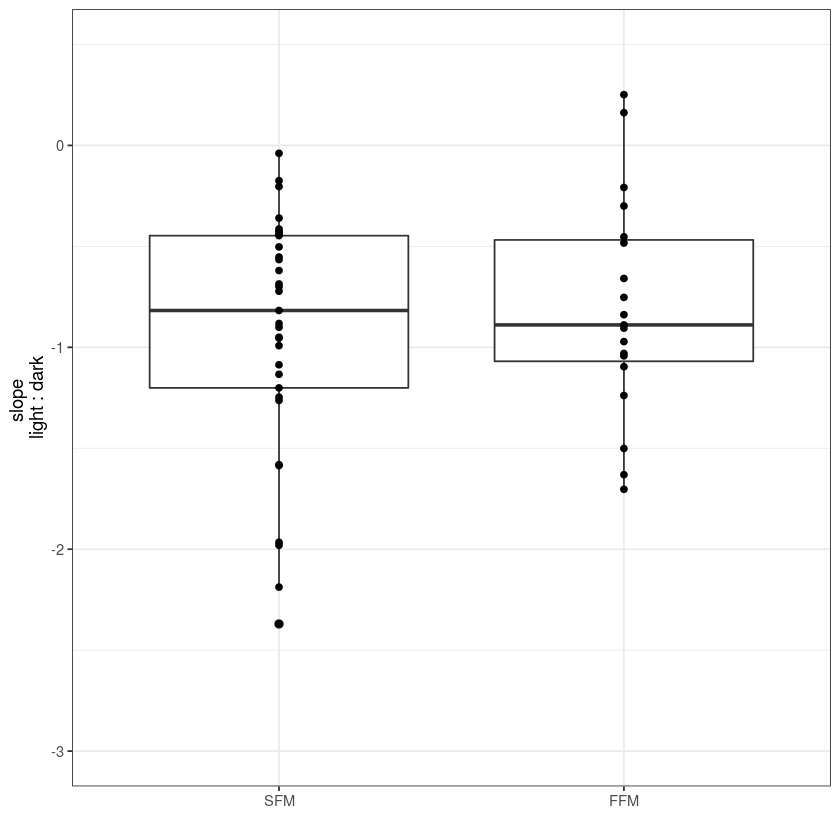

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


png 
  2

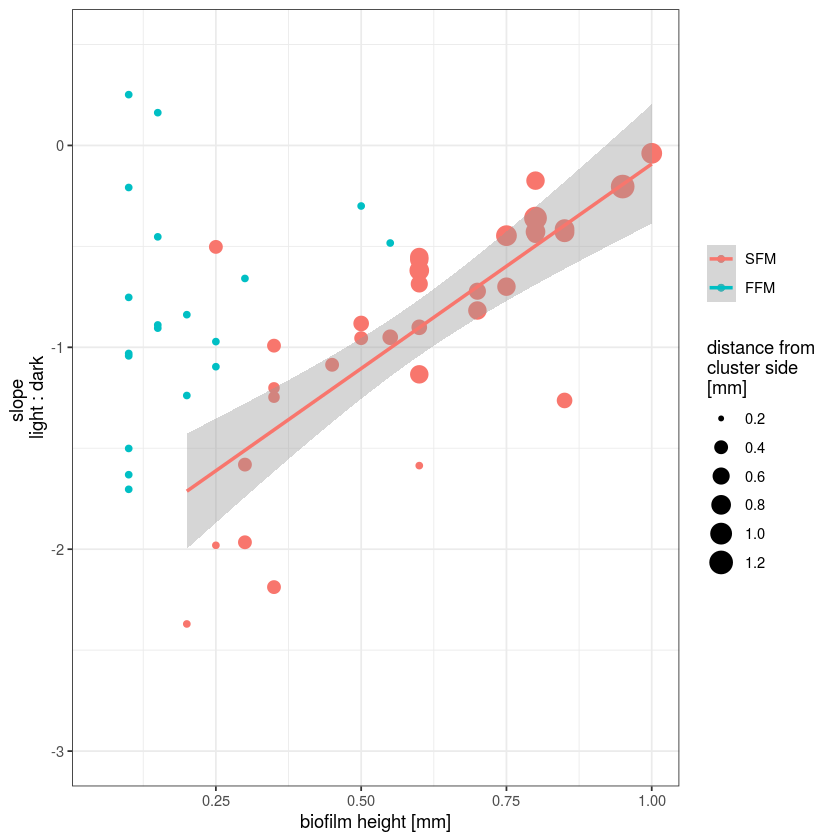

In [78]:
s=2
p0=ggplot(r, aes(x=morpho,y=slope.light/slope.dark))+
geom_boxplot(outlier.size = s)+theme_bw()+ylim(-3,.5)+
geom_point()+ylab('slope \nlight : dark')+xlab('')
p0
sfm=r[r$morpho=='SFM',]
ffm=r[r$morpho=='FFM',]

t.test(sfm$slope.light/sfm$slope.dark,ffm$slope.light/ffm$slope.dark,'two.sided')
p1=ggplot(r, aes(x=h,y=slope.light/slope.dark,color=morpho))+
geom_point(size=s)+theme_bw()+ylim(-3,.5)+
theme(legend.title=element_blank())+#geom_smooth(method='lm',se=T,alpha=.3)+
ylab('slope \nlight : dark')+xlab('biofilm height [mm]')+
# facet_grid(.~morpho)+
theme(plot.title = element_text(hjust = 0.5))+
geom_smooth(data=r[r$morpho=='SFM',],method='lm',se=TRUE)+theme(legend.position='bottom')

p2=ggplot(r[r$morpho=='SFM',], aes(x=dist2,y=slope.light/slope.dark))+
geom_point(size=s)+theme_bw()+ylim(-3,.5)+
theme(legend.title=element_blank())+
ylab('slope light : dark')+xlab('distance from \ncluster side [mm]')+
facet_grid(.~morpho)+
theme(plot.title = element_text(hjust = 0.5))+
geom_smooth(method='lm',se=TRUE)

p3=ggplot(r[r$morpho=='SFM',], aes(x=h,y=dist2))+
geom_point(size=s)+theme_bw()+
theme(legend.title=element_blank())+#geom_smooth(method='lm',se=T,alpha=.3)+
ylab('slope \nlight : dark')+xlab('biofilm height [mm]')+
# facet_grid(.~morpho)+
theme(plot.title = element_text(hjust = 0.5))+
geom_smooth(method='lm',se=TRUE)
m=lm(slope.light/slope.dark~h, data=ffm)
summary(m)
m1=lm(slope.light/slope.dark~h, data=sfm)
summary(m1)
m2=lm(slope.light/slope.dark~dist2, data=sfm)
summary(m2)

r$dist3=round(r$dist2,1)
p1=ggplot(r, aes(x=h,y=slope.light/slope.dark,color=morpho))+
geom_point()+
theme_bw()+ylim(-3,.5)+
geom_point(data=r[(r$morpho=='SFM')&(r$dist2>0.1),], aes(x=h,y=slope.light/slope.dark,size=dist3))+
ylab('slope \nlight : dark')+xlab('biofilm height [mm]')+
scale_size_continuous(name='distance from \ncluster side \n[mm]')+
labs(color = "")+geom_smooth(data=r[r$morpho=='SFM',],method='lm',se=TRUE)#+theme(legend.position='bottom')
p1



grid.arrange(p0,p1,ncol=2,widths=c(1.2,3))
dev.off()

In [36]:
m=lm(slope.dark~vol+dist2, data=r[r$morpho=='SFM',])
summary(m)



Call:
lm(formula = slope.dark ~ vol + dist2, data = r[r$morpho == "SFM", 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-78.415 -28.328  -7.163  28.163  78.836 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -89.7769    17.8685  -5.024 1.85e-05 ***
vol          -8.5626     8.0151  -1.068    0.293    
dist2        -0.5561     0.4816  -1.155    0.257    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.19 on 32 degrees of freedom
Multiple R-squared:  0.2356,	Adjusted R-squared:  0.1878 
F-statistic: 4.931 on 2 and 32 DF,  p-value: 0.01359



Call:
lm(formula = slope.dark ~ vol, data = r[r$morpho == "SFM", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-78.036 -26.513  -2.089  30.401  83.607 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -103.620     13.317  -7.781 5.77e-09 ***
vol          -15.499      5.334  -2.906  0.00649 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.4 on 33 degrees of freedom
Multiple R-squared:  0.2037,	Adjusted R-squared:  0.1796 
F-statistic: 8.444 on 1 and 33 DF,  p-value: 0.006495


$observed
[1] -0.03595583

$expected
[1] -0.02941176

$sd
[1] 0.05404031

$p.value
[1] 0.903615


Call:
lm(formula = slope.light ~ vol, data = r[r$morpho == "SFM", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-84.020 -35.492  -8.769  31.863 133.880 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  156.075     17.573   8.881 2.89e-10 ***
vol          -19.036      7.038  -2.705   0.0107 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 55.95 on 33 degrees of freedom
Multiple R-squared:  0.1814,	Adjusted R-squared:  0.1566 
F-statistic: 7.315 on 1 and 33 DF,  p-value: 0.01073


$observed
[1] 0.03780279

$expected
[1] -0.02941176

$sd
[1] 0.05350604

$p.value
[1] 0.2090417


Call:
lm(formula = slope.dark ~ c_height, data = r[r$morpho == "SFM", 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-71.178 -40.334  -0.546  30.156  93.282 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -105.16      27.26  -3.857 0.000504 ***
c_height      -32.58      27.38  -1.190 0.242437    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.53 on 33 degrees of freedom
Multiple R-squared:  0.04116,	Adjusted R-squared:  0.01211 
F-statistic: 1.417 on 1 and 33 DF,  p-value: 0.2424


$observed
[1] -0.03398332

$expected
[1] -0.02941176

$sd
[1] 0.05414026

$p.value
[1] 0.9327073


Call:
lm(formula = slope.light ~ c_height, data = r[r$morpho == "SFM", 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-63.19 -38.40 -17.01  38.67 113.72 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   223.43      30.53   7.319 2.12e-08 ***
c_height     -112.64      30.65  -3.675 0.000838 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.1 on 33 degrees of freedom
Multiple R-squared:  0.2904,	Adjusted R-squared:  0.2689 
F-statistic:  13.5 on 1 and 33 DF,  p-value: 0.0008383


$observed
[1] -0.02844312

$expected
[1] -0.02941176

$sd
[1] 0.05394324

$p.value
[1] 0.9856733


Call:
lm(formula = slope.dark ~ stv, data = r[r$morpho == "SFM", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-64.743 -39.850  -4.804  21.383  83.662 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -180.628     20.342  -8.879 2.91e-10 ***
stv            9.146      3.901   2.345   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.99 on 33 degrees of freedom
Multiple R-squared:  0.1428,	Adjusted R-squared:  0.1168 
F-statistic: 5.497 on 1 and 33 DF,  p-value: 0.02522


$observed
[1] -0.05096579

$expected
[1] -0.02941176

$sd
[1] 0.05418981

$p.value
[1] 0.6908141


Call:
lm(formula = slope.light ~ stv, data = r[r$morpho == "SFM", ])

Residuals:
   Min     1Q Median     3Q    Max 
-96.43 -48.31 -17.58  37.23 111.08 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   68.337     27.170   2.515   0.0169 *
stv            9.823      5.210   1.885   0.0682 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 58.76 on 33 degrees of freedom
Multiple R-squared:  0.09724,	Adjusted R-squared:  0.06988 
F-statistic: 3.554 on 1 and 33 DF,  p-value: 0.06822


$observed
[1] 0.06590887

$expected
[1] -0.02941176

$sd
[1] 0.05426198

$p.value
[1] 0.0789733


Call:
lm(formula = slope.dark ~ dist2, data = r[r$morpho == "SFM", 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-78.43 -30.14  -4.48  26.83  76.80 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -88.0786    17.8357  -4.938 2.21e-05 ***
dist2        -0.9417     0.3195  -2.947  0.00585 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.28 on 33 degrees of freedom
Multiple R-squared:  0.2083,	Adjusted R-squared:  0.1843 
F-statistic: 8.684 on 1 and 33 DF,  p-value: 0.005851


$observed
[1] -0.01749901

$expected
[1] -0.02941176

$sd
[1] 0.05413018

$p.value
[1] 0.8258119


Call:
lm(formula = slope.light ~ dist2, data = r[r$morpho == "SFM", 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-82.525 -27.366   2.625  33.309 115.153 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 198.7490    20.8230   9.545 5.13e-11 ***
dist2        -1.6178     0.3731  -4.336 0.000128 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.36 on 33 degrees of freedom
Multiple R-squared:  0.363,	Adjusted R-squared:  0.3437 
F-statistic:  18.8 on 1 and 33 DF,  p-value: 0.0001283


$observed
[1] 0.02230471

$expected
[1] -0.02941176

$sd
[1] 0.05387702

$p.value
[1] 0.3371063


Call:
lm(formula = slope.dark ~ vol + dist2, data = r[r$morpho == "SFM", 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-78.415 -28.328  -7.163  28.163  78.836 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -89.7769    17.8685  -5.024 1.85e-05 ***
vol          -8.5626     8.0151  -1.068    0.293    
dist2        -0.5561     0.4816  -1.155    0.257    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.19 on 32 degrees of freedom
Multiple R-squared:  0.2356,	Adjusted R-squared:  0.1878 
F-statistic: 4.931 on 2 and 32 DF,  p-value: 0.01359


$observed
[1] -0.02198321

$expected
[1] -0.02941176

$sd
[1] 0.0540361

$p.value
[1] 0.8906562


Call:
lm(formula = slope.dark ~ vol * dist2, data = r[r$morpho == "SFM", 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-78.446 -28.699  -7.235  28.101  78.727 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -90.813523  28.573301  -3.178  0.00335 **
vol          -8.090145  12.940123  -0.625  0.53642   
dist2        -0.531410   0.718083  -0.740  0.46484   
vol:dist2    -0.009377   0.199610  -0.047  0.96283   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.86 on 31 degrees of freedom
Multiple R-squared:  0.2356,	Adjusted R-squared:  0.1617 
F-statistic: 3.186 on 3 and 31 DF,  p-value: 0.0374


$observed
[1] -0.02172133

$expected
[1] -0.02941176

$sd
[1] 0.05403573

$p.value
[1] 0.8868262


Call:
lm(formula = slope.light ~ vol + dist2, data = r[r$morpho == 
    "SFM", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-84.929 -27.282   2.477  31.338 111.447 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 199.2657    21.2052   9.397 1.02e-10 ***
vol           2.6051     9.5118   0.274  0.78594    
dist2        -1.7351     0.5715  -3.036  0.00474 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.07 on 32 degrees of freedom
Multiple R-squared:  0.3645,	Adjusted R-squared:  0.3248 
F-statistic: 9.176 on 2 and 32 DF,  p-value: 0.000708


$observed
[1] 0.0223236

$expected
[1] -0.02941176

$sd
[1] 0.05390443

$p.value
[1] 0.3371756


Call:
lm(formula = slope.light ~ vol * dist2, data = r[r$morpho == 
    "SFM", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-85.695 -23.925   0.693  29.012 111.066 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 192.01860   33.86833   5.670 3.15e-06 ***
vol           5.90809   15.33810   0.385    0.703    
dist2        -1.56244    0.85115  -1.836    0.076 .  
vol:dist2    -0.06556    0.23660  -0.277    0.784    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.8 on 31 degrees of freedom
Multiple R-squared:  0.3661,	Adjusted R-squared:  0.3047 
F-statistic: 5.967 on 3 and 31 DF,  p-value: 0.00247


$observed
[1] 0.0236958

$expected
[1] -0.02941176

$sd
[1] 0.05389447

$p.value
[1] 0.3244281

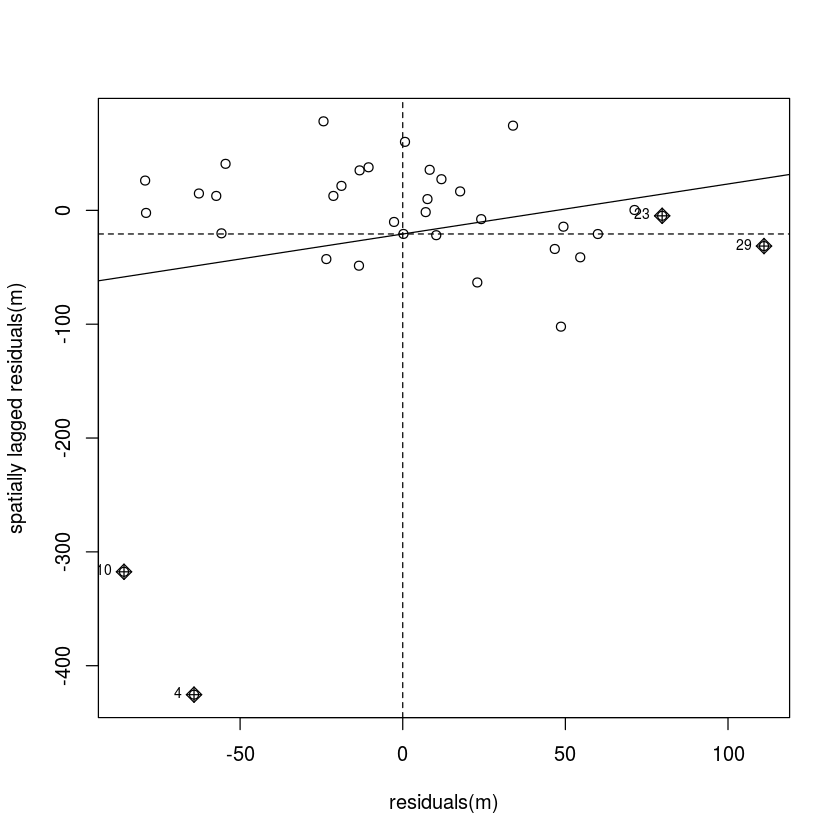

In [118]:
inv_dist = with(r[r$morpho=='SFM',], 1/dist(cbind(x, y), diag = T, upper = T))
inv_dist[inv_dist==Inf]=0
inv_dist = as.matrix(inv_dist)
moran.plot(residuals(m),mat2listw(inv_dist))
m=lm(slope.dark~vol, data=r[r$morpho=='SFM',])
summary(m)
Moran.I(residuals(m), weight = inv_dist, scaled=T)
m=lm(slope.light~vol, data=r[r$morpho=='SFM',])
summary(m)
Moran.I(residuals(m), weight = inv_dist, scaled=T)
m=lm(slope.dark~c_height, data=r[r$morpho=='SFM',])
summary(m)
Moran.I(residuals(m), weight = inv_dist, scaled=T)
m=lm(slope.light~c_height, data=r[r$morpho=='SFM',])
summary(m)
Moran.I(residuals(m), weight = inv_dist, scaled=T)
m=lm(slope.dark~stv, data=r[r$morpho=='SFM',])
summary(m)
Moran.I(residuals(m), weight = inv_dist, scaled=T)
m=lm(slope.light~stv, data=r[r$morpho=='SFM',])
summary(m)
Moran.I(residuals(m), weight = inv_dist, scaled=T)
m=lm(slope.dark~dist2, data=r[r$morpho=='SFM',])
summary(m)
Moran.I(residuals(m), weight = inv_dist, scaled=T)
m=lm(slope.light~dist2, data=r[r$morpho=='SFM',])
summary(m)
Moran.I(residuals(m), weight = inv_dist, scaled=T)
m=lm(slope.dark~vol+dist2, data=r[r$morpho=='SFM',])
summary(m)
Moran.I(residuals(m), weight = inv_dist, scaled=T)
m=lm(slope.dark~vol*dist2, data=r[r$morpho=='SFM',])
summary(m)
Moran.I(residuals(m), weight = inv_dist, scaled=T)
m=lm(slope.light~vol+dist2, data=r[r$morpho=='SFM',])
summary(m)
Moran.I(residuals(m), weight = inv_dist, scaled=T)
m=lm(slope.light~vol*dist2, data=r[r$morpho=='SFM',])
summary(m)
Moran.I(residuals(m), weight = inv_dist, scaled=T)
